# Исследование данных сервиса аренды самокатов GoFast.

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:


**Без подписки:**

абонентская плата отсутствует;

стоимость одной минуты поездки — 8 рублей;

стоимость старта (начала поездки) — 50 рублей;


**С подпиской Ultra:**

абонентская плата — 199 рублей в месяц;

стоимость одной минуты поездки — 6 рублей;

стоимость старта — бесплатно.

Описание данных. В основных данных есть информация о пользователях, их поездках и подписках.
Пользователи — users_go.csv, Поездки — rides_go.csv, 
Подписки — subscriptions_go.csv.

#### Шаг 1. Загрузка данных

**Импортруем необходимые библиотеки:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import sqrt
from scipy.stats import ttest_ind

**Cохраним наши таблицы в переменные и выведем общую информацию и первые строки каждого датафрейма:**

In [3]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
sub = pd.read_csv('/datasets/subscriptions_go.csv')
display(users.info(), rides.info(), sub.info())
display(users.head(10), rides.head(10), sub.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

None

None

None

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Для вывода `info` дополнительно необязательно писать `display`
</div>

**Мы видим, что все таблицы представлены в корректном виде.**

#### Шаг 2. Предобработка данных

**В таблице с поездками поменяем тип данных в строке с датой на date:**

In [3]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


**Создадим новый столбец с номером месяца на основании столбца date:**

In [4]:
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


**Проверим датафреймы на наличие пропущенных значений:**

In [5]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [6]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [7]:
sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Как мы видим, в таблицах нет пропущенных значений. Проверим датафреймы на дубликаты:**

In [8]:
users.duplicated().sum()

31

**В таблице users 31 дубликат, удалим их:**

In [9]:
users = users.drop_duplicates()
users.duplicated().sum()

0

**Как мы видим, в таблице не осталось дубликатов. Перейдем к таблице rides:**

In [10]:
rides.duplicated().sum()

0

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
И про дубликаты не забываешь, замечательно. Но действия по первичному анализу датафреймов схожи, можно было бы функцию написать 

**В таблице rides нет дубликатов. В последней таблице sub также нет дубликатов, т.к. она содержит всего две не одинаковые строки.**

#### Шаг 3. Исследовательский анализ данных

**Опишем и визуализируем общую информацию о пользователях и поездках.**

**Частота встречаемости городов:**

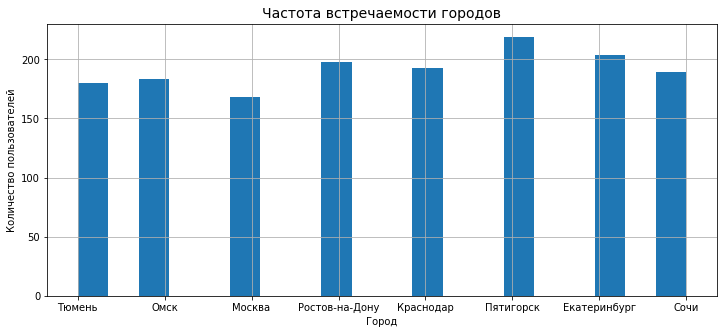

In [11]:
users['city'].hist(bins=20, figsize=(12, 5));
plt.title('Частота встречаемости городов', fontsize=14)
plt.xlabel('Город')
plt.ylabel('Количество пользователей');

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Рекомендую ещё сортировать значения, так график более читаемым будет 

**Как мы видим, колличество пользователей из разных городов примерно одинаковое, наименьшее количество в Москве, наибольшее - в Пятигорске.**

**Соотношение пользователей с подпиской и без подписки:**

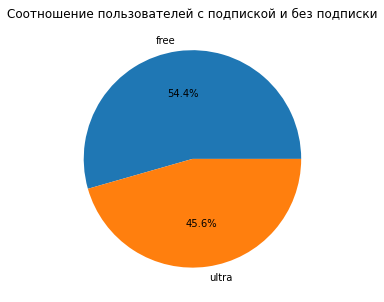

In [12]:
subscription_counts = users['subscription_type'].value_counts()
subscription_counts.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')
plt.show()

**Как мы видим, большая часть пользователей использует сервис без подписки.**

**Возраст пользователей:**

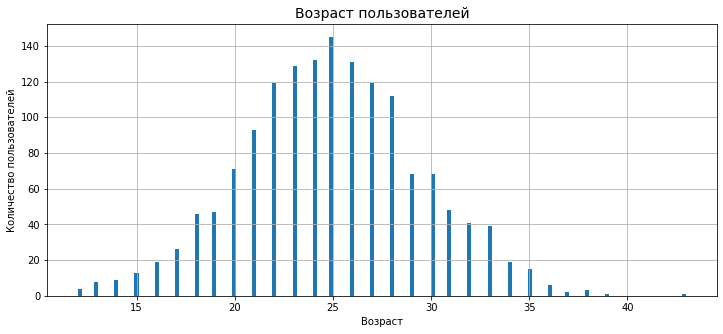

In [13]:
users['age'].hist(bins=150, figsize=(12, 5));
plt.title('Возраст пользователей', fontsize=14)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей');

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Всё же пользователь условных 44 лет вполне может быть в сервисе аренды самокатов, в таком случае, когда сведение не сильно то выбивается из реальности его можно и лучше оставлять 
</div>

<span style="color:blue"> Спасибо за пометку! Исправил.</span>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Пожалуйста, не всегда значение, если больше какой-то границы - сто процентов аномалия, рекомендую соотносить с действительностью, как например здесь, возраст в 44 - вполне возможный)

</div>

**Расстояние, которое пользователь преодолел за одну поездку:**

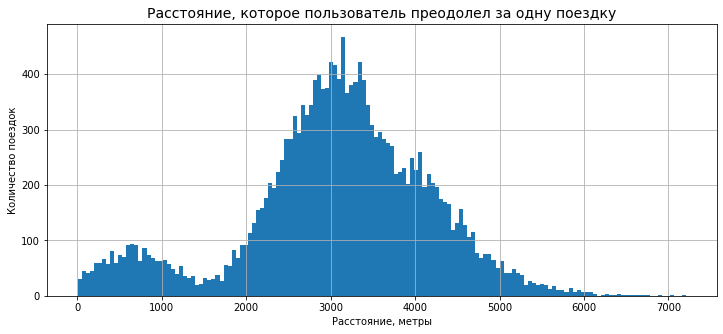

In [14]:
rides['distance'].hist(bins=150, figsize=(12, 5));
plt.title('Расстояние, которое пользователь преодолел за одну поездку', fontsize=14)
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество поездок');

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Наличие пары пиков дистанций наталкивает на мысль, что может быть несколько сценариев пользования приложением и с этими категориями стоит отдельно работать

**На гистограмме видно, что среднее расстояние поездки составиор около 3000 метров.**

**Продолжительность поездок:**

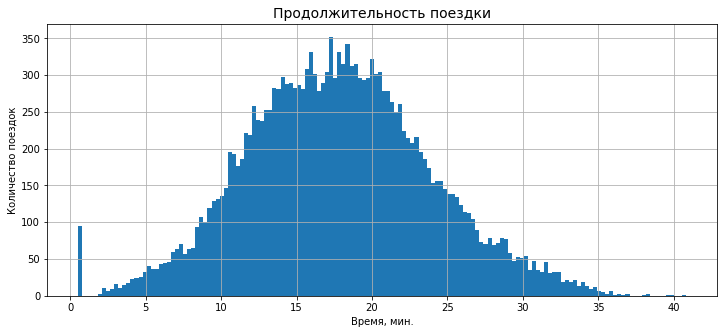

In [15]:
rides['duration'].hist(bins=150, figsize=(12, 5));
plt.title('Продолжительность поездки', fontsize=14)
plt.xlabel('Время, мин.')
plt.ylabel('Количество поездок');

**Видим, что среднее время поезки составило около 17 минут. Также, на графике присутсвеут аномалия, суть меньше ста значиений в левой части, изучим их:**

In [16]:
rides[rides['duration']<2].mean()

/tmp/ipykernel_115/50561959.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  rides[rides['duration']<2].mean()


user_id     1092.210526
distance    5113.176549
duration       0.500000
month          6.484211
dtype: float64

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
И эта проблема тобой обнаружена, молодец. Возможно это так сократилось 30 минут, так как нет поездок ровно с 30 минутами гипотеза не лишена оснований, хоть и странная).
    
Здесь хочется обратить внимание на то, как можно подходить к проверке корректности даннных, в этом пункте ты сделал вывод о некорректности данных формально на основе скорости, скорость оказалось запредельной в таких поездках и это странно, как и в случае с довольно короткими по дистанции, но до нескольких минут по времени поездками. И можно было посчитать скорость по каждой поездке и изучить этот график. В прошлом проекте возможно было оценить стоимость квадратного метра, если в каких-то объектах она аномально - стоит подробнее изучить

**Все значения равны 0.5 минутам. Возможно, при заполнении таблицы допустили ошибку, и вместо количества минут, писали количество часов (0.5 часа = 30 минут). Проверим это. У нас есть среднее растояние этих поездок, выделим в датафрейме строки с похожими значениями расстояния, и найдем среденюю продолжительность таких поездкок:**

In [17]:
rides.query('5100<distance<5150').mean()

/tmp/ipykernel_115/4100356910.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  rides.query('5100<distance<5150').mean()


user_id     1017.081633
distance    5126.859931
duration      23.109267
month          6.530612
dtype: float64

**Видим, что средняя продолжительность таких поездок равна чуть более 23 минут. Наша теория не подтвердилась. Т.к. общее количесвтво строк более 18000, мы можем просто удалить эти странные строки:**

In [18]:
rides = rides[rides['duration']>1]

#### Шаг 4. Объединение данных

**Объединим данные о пользователях, поездках и подписках в один датафрейм.**

In [19]:
rides_users = rides.merge(users, on='user_id', how='left')
rides_users.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


**Проверим общую информацию и наличие пропусков в таблице:**

In [20]:
rides_users.info(), rides_users.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int64         
 5   name               17973 non-null  object        
 6   age                17973 non-null  int64         
 7   city               17973 non-null  object        
 8   subscription_type  17973 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


(None,
 user_id              0
 distance             0
 duration             0
 date                 0
 month                0
 name                 0
 age                  0
 city                 0
 subscription_type    0
 dtype: int64)

**Видим, что пропусков в таблице нет.**

**Создадим ещё два датафрейма из датафрейма, созданного на предыдущем этапе. Первый c данными о пользователях без подписки:**

In [21]:
rides_users_free = rides_users[rides_users['subscription_type'] == 'free']
rides_users_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free


**Второй с данными о пользователях с подпиской:**

In [22]:
rides_users_ultra = rides_users[rides_users['subscription_type'] == 'ultra']
rides_users_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё добавить проверку, что после соединения таблиц не возникли пропуски, что размер объъединенной таблице соответствует ожиданиям

</div>

<span style="color:blue"> Спасибо за пометку! Добавил.</span>

**Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий. Для категории без подписки:**

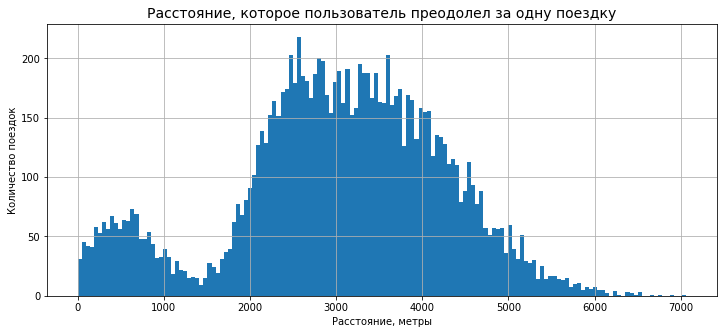

In [23]:
rides_users_free['distance'].hist(bins=150, figsize=(12, 5));
plt.title('Расстояние, которое пользователь преодолел за одну поездку', fontsize=14)
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество поездок');

**Среднее расстояние по графику довольно растянуто, составляет около 3000 метров.**

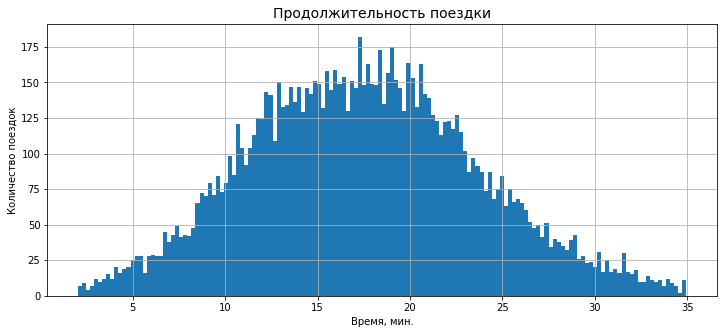

In [24]:
rides_users_free['duration'].hist(bins=150, figsize=(12, 5));
plt.title('Продолжительность поездки', fontsize=14)
plt.xlabel('Время, мин.')
plt.ylabel('Количество поездок');

**Видно, что средняя продолжительность составила примерно 18 минут.**

**Для категории с подпиской:**

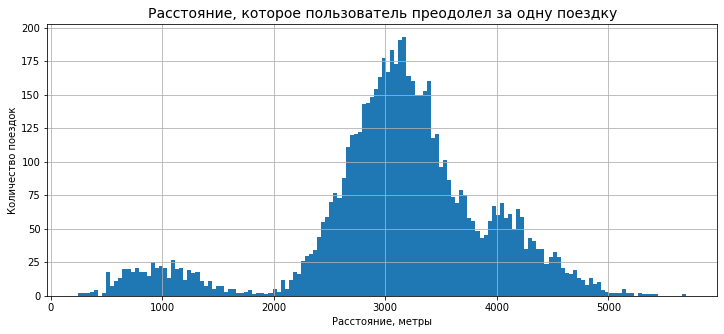

In [25]:
rides_users_ultra['distance'].hist(bins=150, figsize=(12, 5));
plt.title('Расстояние, которое пользователь преодолел за одну поездку', fontsize=14)
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество поездок');

**В отличии от категории без подписки, тут уже более явно вырежаено среднее расстояние чуть более 3000 метров.**

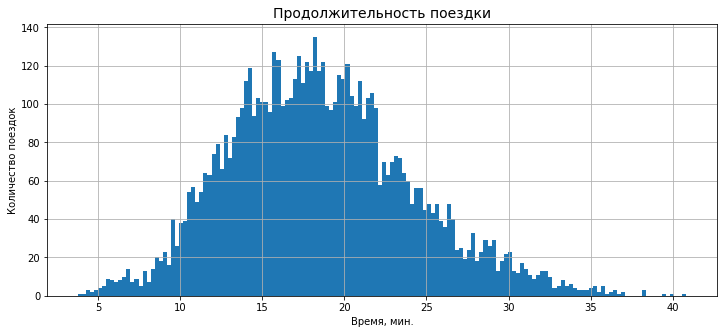

In [26]:
rides_users_ultra['duration'].hist(bins=150, figsize=(12, 5));
plt.title('Продолжительность поездки', fontsize=14)
plt.xlabel('Время, мин.')
plt.ylabel('Количество поездок');

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Проще сравнивать распределения на одном графике, поэтому рекомендовал бы продолжительность двух категорий расположить на одном графике, аналогично с расстоянием
* На графиках отлично смотрится среднее или медиана, как дополнительное опорной значение, вот [тут](https://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib) можно посмотреть, как добавить такую визуализацию

**Среднее же время поездки с подпиской варьируется между 15 и 20 минутами.**

#### Шаг 5. Подсчёт выручки

**Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [27]:
aggregated_df = rides_users.groupby(['user_id', 'month','subscription_type']).agg({'distance': 'sum','duration': 'sum','date': 'count'}).reset_index()
aggregated_df.rename(columns={'date': 'trip_count'}, inplace=True)
aggregated_df.head()

,user_id,month,subscription_type,distance,duration,trip_count
0,1,1,ultra,7027.511294,41.416640,2
1,1,4,ultra,754.159807,6.232113,1
2,1,8,ultra,6723.470560,44.776802,2
3,1,10,ultra,5809.911100,31.578017,2
4,1,11,ultra,7003.499363,53.397424,3


**В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа. Чтобы соблюдалось данное условие, переделаем датафрейм представленный выше, и внесем некоторые коррекции в изначальный:**

In [28]:
rides_users['duration'] = np.ceil(rides_users['duration'])
rides_users.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra


**Напишем функцию для подсчета стоимости поездки исходя из наличия подписки и применим ее к изначальному датафрейму:**

In [29]:
def calculate_revenue(row):
    if row['subscription_type'] == 'ultra':
        return row['duration'] * 6
    else:
        return row['duration'] * 8 + 50
rides_users['revenue'] = rides_users.apply(calculate_revenue, axis=1)

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

* в датафрейме все буквы маленькие, а не `Ultra` 
* дополнительно нет прибавления стоимости месячной подписки, её нужно учесть при агрегации по месяцам</div>

<span style="color:blue"> Спасибо за пометку! Добавил.</span>

**Теперь заново создадим агрегированный датафрейм:**

In [30]:
aggregated_df = rides_users.groupby(['user_id', 'month', 'subscription_type']).agg({'distance': 'sum', 'duration': 'sum', 'date': 'count', 'revenue': 'sum'}).reset_index()
aggregated_df.rename(columns={'date': 'trip_count'}, inplace=True)
aggregated_df.head()

,user_id,month,subscription_type,distance,duration,trip_count,revenue
0,1,1,ultra,7027.511294,42.0,2,252.0
1,1,4,ultra,754.159807,7.0,1,42.0
2,1,8,ultra,6723.470560,46.0,2,276.0
3,1,10,ultra,5809.911100,32.0,2,192.0
4,1,11,ultra,7003.499363,56.0,3,336.0


**Дополнительно придавим стоимость месячной пописки:**

In [31]:
aggregated_df['revenue'] += aggregated_df.apply(lambda row: 199 if row['subscription_type'] == 'ultra' else 0, axis=1)
aggregated_df.head()

,user_id,month,subscription_type,distance,duration,trip_count,revenue
0,1,1,ultra,7027.511294,42.0,2,451.0
1,1,4,ultra,754.159807,7.0,1,241.0
2,1,8,ultra,6723.470560,46.0,2,475.0
3,1,10,ultra,5809.911100,32.0,2,391.0
4,1,11,ultra,7003.499363,56.0,3,535.0


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Теперь доходы соответствуют ожиданиям, можно ещё было считать доход уже в агрегированной таблице `aggregated_df`, чтобы в один подход рассчитать доход 

</div>

#### Шаг 6. Проверка гипотез

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

**Создадим датафрейм со всеми поездками всех пользователей:**

In [32]:
users_and_rides = rides.merge(users, on='user_id', how='left')
users_and_rides.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


**Теперь разделим группы по типу подписки:**

In [33]:
ultra_users = users_and_rides[users_and_rides['subscription_type'] == 'ultra']['duration']
free_users = users_and_rides[users_and_rides['subscription_type'] == 'free']['duration']

**Проведем тест для этих выборок:**

In [34]:
alpha = 0.05
results = ttest_ind(ultra_users, free_users)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Пользователи с подпиской тратят меньше')
else:
    print('Пользователи с подпиской тратят больше')

p-значение: 9.408936148907799e-28
Пользователи с подпиской тратят меньше


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

На шаге проверки стат гипотез ожидалось использование статистических тестов
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Ещё и для проверки дистанции пользователей `ultra` ожидалась стат гипотеза, но не буду возвращать проект на доработку из-за этого, желаю успехов в дальнейшем обучении) 
</div>

<span style="color:blue"> Спасибо за пометку! Исправил.</span>

**Как мы видим, пользователи с подпиской тратят меньше времени на поездки. Гипотеза не подтвердилась.**

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим эту гипотезу:**

In [35]:
print('Среднее расстояние поездки с подпиской:', users_and_rides.query('subscription_type == "ultra"')['distance'].mean())

Среднее расстояние поездки с подпиской: 3115.4453880370247


**Среднее расстояние поездки с подпиской составило чуть боле 3115 метров. Значит можно сказать, что оно не превышает оптимальное расстояние с точки зрения износа самоката (3130 метров). Гипотеза верна.**

**P.S. Если мы проверим не среднее, а медиану, мы увидим значение еще более близкое к оптимальному расстоянию:**

In [36]:
print('Медиана расстояния поездки с подпиской:', users_and_rides.query('subscription_type == "ultra"')['distance'].median())

Медиана расстояния поездки с подпиской: 3148.6372291760854


**6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

**На основе данных из агрегированного датафрейма разобьем на группы пользователей с подпииской и без:**

In [37]:
users_ultra = aggregated_df[aggregated_df['subscription_type'] == 'ultra']['revenue']
users_free = aggregated_df[aggregated_df['subscription_type'] == 'free']['revenue']

**Теперь проведем тест для этих выборок:**

In [38]:
alpha = 0.05
results = ttest_ind(users_ultra, users_free)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Пользователи с подпиской приносят меньше')
else:
    print('Пользователи с подпиской приносят больше')

p-значение: 4.0628227349726575e-30
Пользователи с подпиской приносят меньше


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Здесь подскажу, что ожидается проверка по доходам отдельных пользователей по месяцам.
    
То есть нужно использовать `aggregated_df`
</div>

<span style="color:blue"> Спасибо за пометку! Исправил.</span>

**Как видим, выручка от пользователей с подпиской по месяцам оказалась меньше, гипотеза не подтвердилась.**

**6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

**В этом случае, выборки для которых нужно будет делать тест зависимы (парные). Чтобы проверить эту гипотезу, нужно применить метод scipy.stats.ttest_rel().**

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

А как звучит альтернативная гипотеза? 
</div>

**Альтернативная гиптеза звучала бы так: колличество обращений не снизилось.**

#### Шаг 7. Распределения

**7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.**

Минимальное количество промокодов: 1161


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


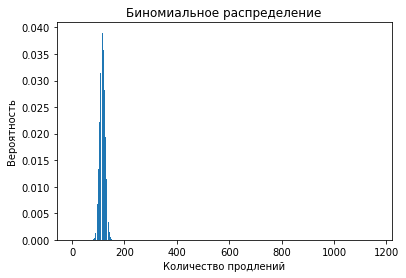

In [39]:
p = 0.10
target = 100
alpha = 0.95


def find_min_coupons(p, target, alpha):
    n = target
    while True:
        prob = st.binom.cdf(target - 1, n, p)
        if prob <= 1 - alpha:
            return n
        n += 1

min_coupons = find_min_coupons(p, target, alpha)
print(f"Минимальное количество промокодов: {min_coupons}")

x = np.arange(0, min_coupons + 1)
y = st.binom.pmf(x, min_coupons, p)

plt.bar(x, y)
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение')
plt.show()

**Минимальное количество промокодов, которые нужно раздать, чтобы подписку продлили хотя бы 100 пользователей равно 1161. В начале мы задали параметры распределения, p - вероятность проделения подписки, target - минимальное количество пользователей для выполнения плана, alpha - уровень доверия, при котором шанс не выполнить план составляет 5%. Далее мы написали функцию, которая ищет минимальное количество промокодов и применили ее с нашеми параметрами, в конце мы построили график распределения.**

**7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 0.15371708296369768


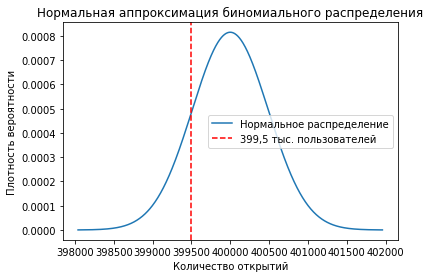

In [40]:
n = 1000000
p = 0.4

mu = n * p
sigma = np.sqrt(n * p * (1 - p))

x_value = 399500

prob = st.norm.cdf(x_value, mu, sigma)
print("Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей:", prob)

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = st.norm.pdf(x, mu, sigma)

plt.plot(x, y, label='Нормальное распределение')
plt.axvline(x=x_value, color='r', linestyle='--', label=f'399,5 тыс. пользователей')
plt.xlabel('Количество открытий')
plt.ylabel('Плотность вероятности')
plt.title('Нормальная аппроксимация биномиального распределения')
plt.legend()
plt.show()


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Задачи на распределения решены абсолютно верно, молодец!

**Верятность того, что уведомление откроют не более 399,5 тыс. пользователей равна чуть более 15%. В начале мы расчитали параметры распределения и нашли нужную нам вероятность. Далее мы построили график нормальной апоксимации биноминального распределения.**

#### Напишите общий вывод

**Выполняя этот проект, мы использовали как знания полученные из прошлых спринтов, так и из текушщего. В начале проекта мы открыли датафреймы, проверили значения в них, поменяли тип данных в некоторых столбца. После этого мы проверили таблицы на пропуски, обработали дубликаты и аномалии в данных. Далее мы добавили несколько столбцов, создали другие таблицы с агрегированными данными на основе начальных. В шестом пунке мы проверили несколько гипотиз, которые позволят продакт-менеджерам увеличить количество пользователей с подпиской. В последнем пункте, мы применили знания, полученные в ходе текущего спринта, на практике, и рассчитали некоторые вероятности для двух событий. Эти расчеты помогли нам закрепить изученный материал, который пригодится нам в будующих кейсах**